## AT&T

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
from aggregators import (
    race, 
    income, 
    redlining, 
    plot_race, 
    speed_breakdown, 
    unserved, 
    bucket_and_bin
)

In [3]:
# inputs
fn_att = '../data/output/speed_price_att.csv.gz'

# outputs
fn_speed = '../data/output/figs/fig1_att.csv'
fn_fig3a = '../data/output/figs/fig3_income.csv'
fn_fig3b = '../data/output/figs/fig3_race.csv'
fn_fig3c = '../data/output/figs/fig3_redline.csv'

In [4]:
att = pd.read_csv(fn_att, compression='gzip')
len(att)

429876

In [5]:
att.major_city.nunique()

20

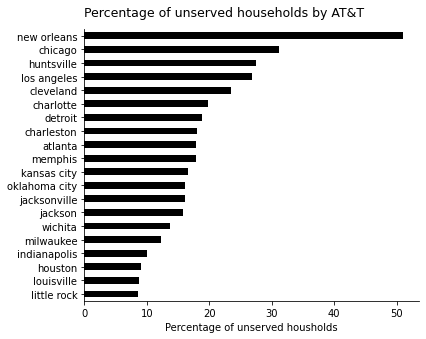

In [6]:
unserved(att, isp='AT&T')

In [7]:
att = att[att.speed_down != 0]
len(att)

343591

In [8]:
att = bucket_and_bin(att)

In [9]:
# who gets options?
att[(att['speed_down'] != att['fastest_speed_down']) &
    (~att['fastest_speed_down'].isnull())]['speed_down'].value_counts(normalize=True)

300.0    0.999987
100.0    0.000007
25.0     0.000007
Name: speed_down, dtype: float64

In [10]:
# what is the price per Mbps?
55 / att.speed_down.describe()

count     0.000160
mean      0.353065
std       0.424330
min      71.614583
25%       2.200000
50%       0.550000
75%       0.183333
max       0.183333
Name: speed_down, dtype: float64

In [11]:
# make the above for each city:
city2speeds = pd.DataFrame()
for (city, state), _df in att.groupby(['major_city', 'state']):
    row = _df.speed_down_bins.value_counts(normalize=True, sort=False).to_frame().T
    row.reset_index(drop=True, inplace=True)
    row['major_city'] = city.title()
    row['state'] = state
    city2speeds = city2speeds.append(row)
city2speeds.to_csv(fn_speed, index=False)

In [12]:
variety = att.groupby(['major_city', 'state']).speed_down_bins.value_counts(normalize=True)
homogenous_cities = variety[variety >= .95].index.get_level_values(0)
len(homogenous_cities)

0

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


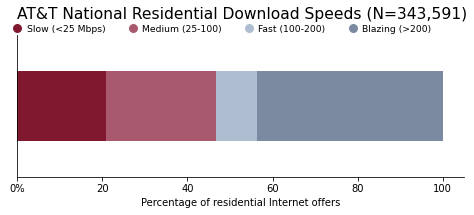

In [13]:
speed_breakdown(att)

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


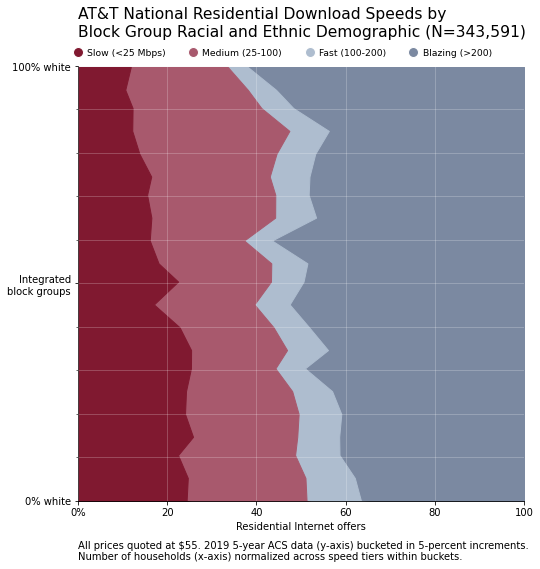

In [14]:
plot_race(att)

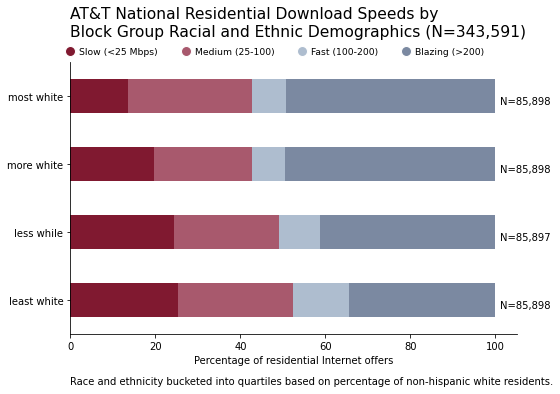

In [15]:
race(att)

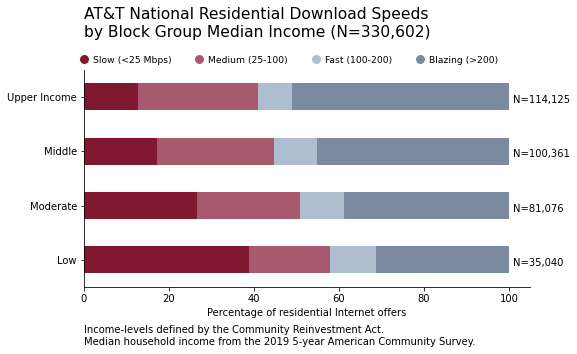

In [16]:
income(att)

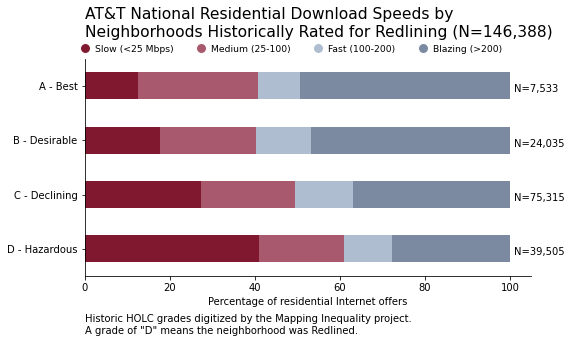

In [17]:
redlining(att)

## City by City

atlanta


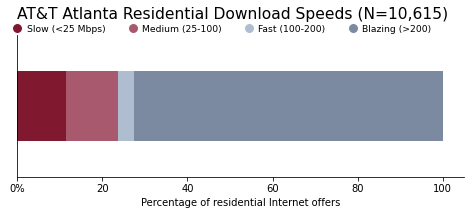

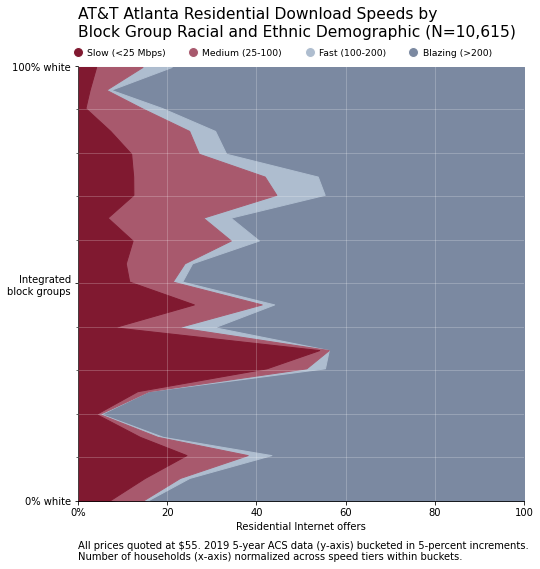

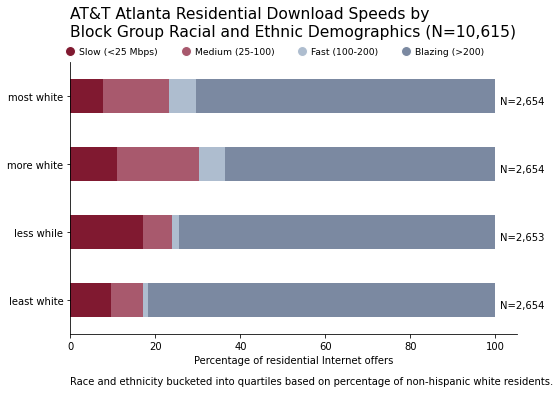

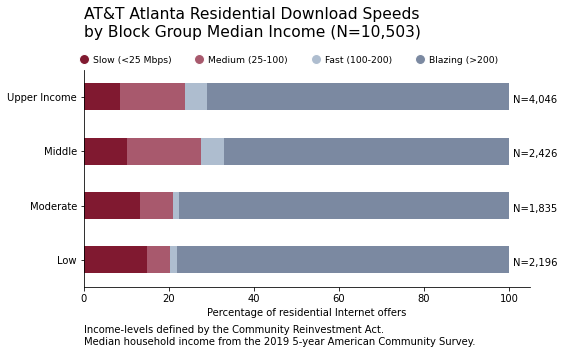

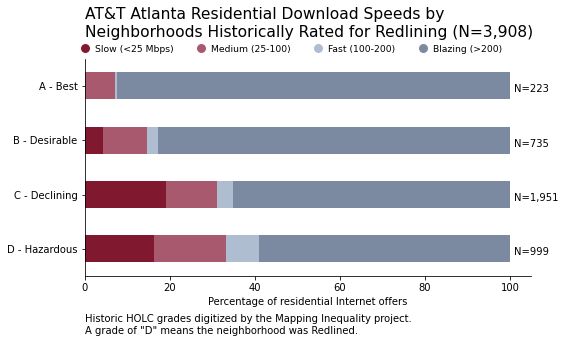

*******************************************************************************
charleston


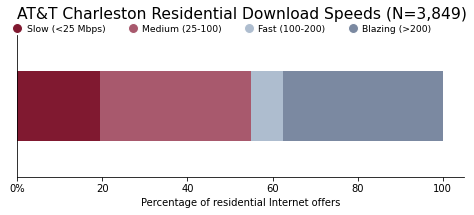

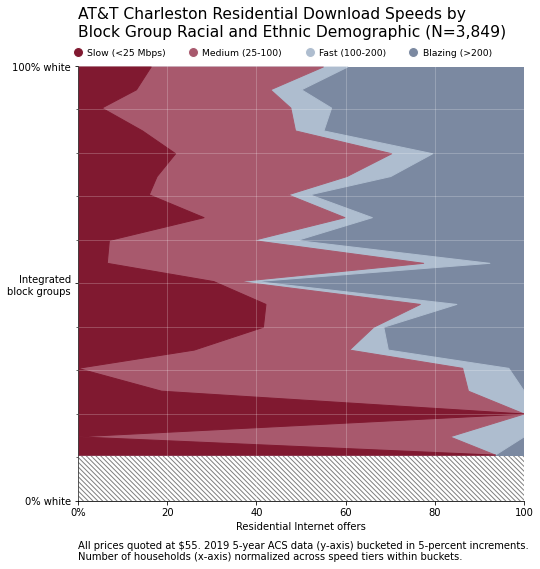

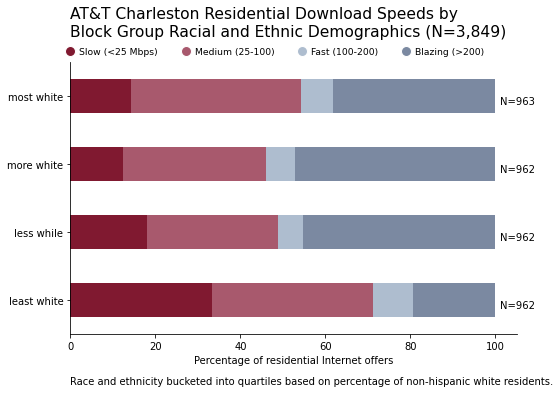

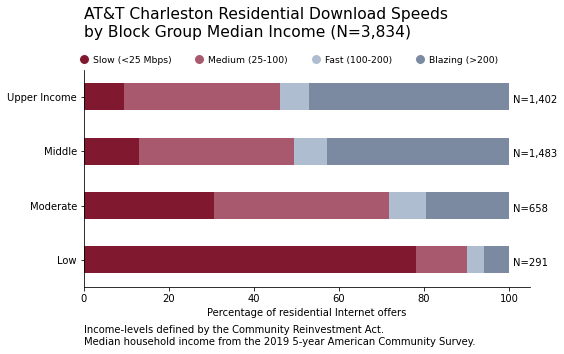

*******************************************************************************
charlotte


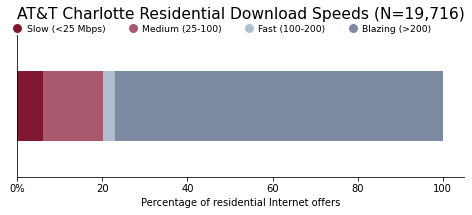

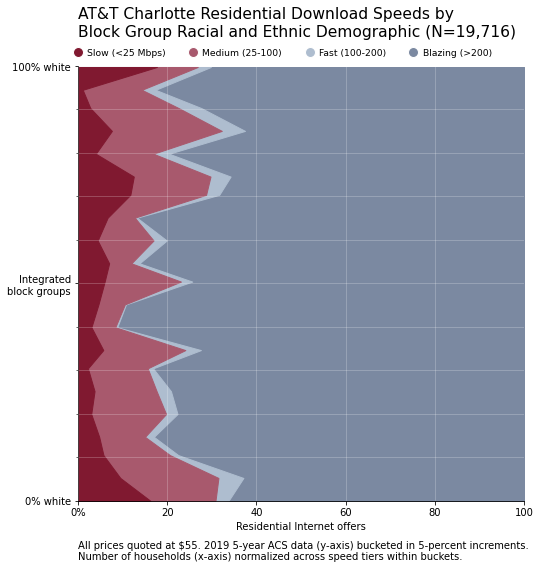

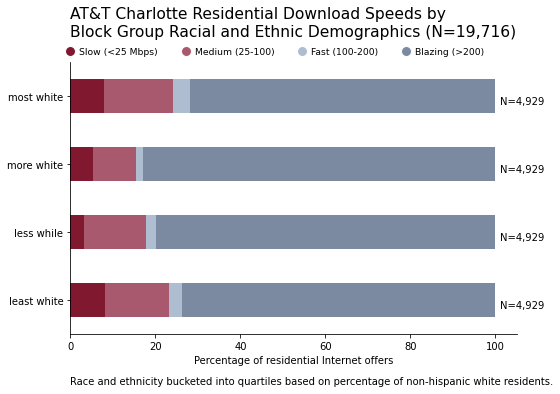

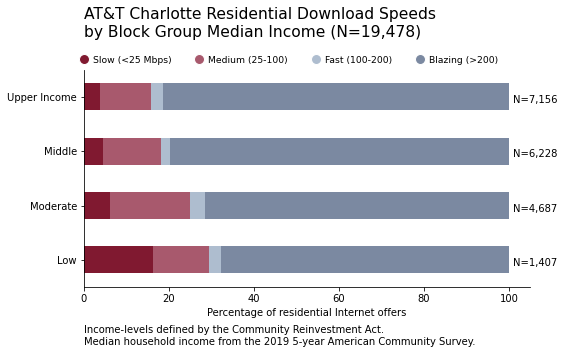

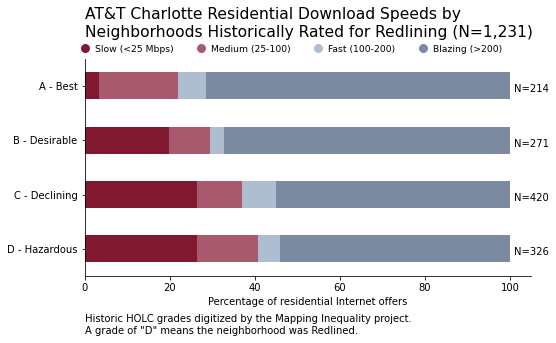

*******************************************************************************
chicago


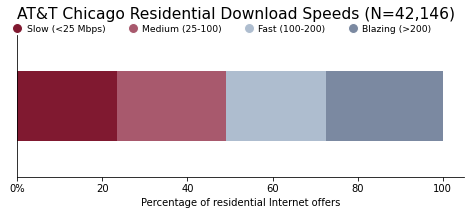

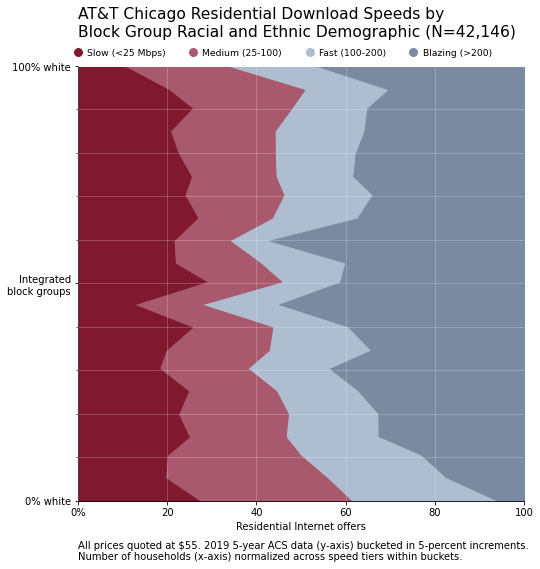

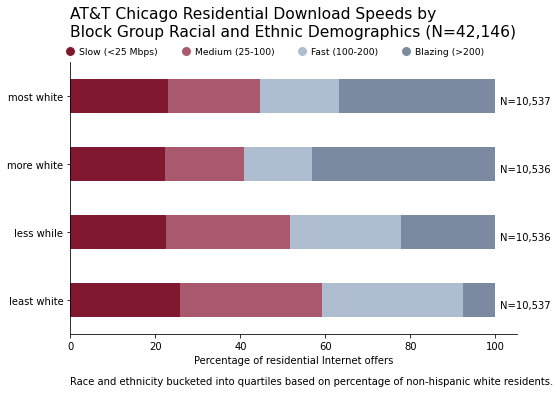

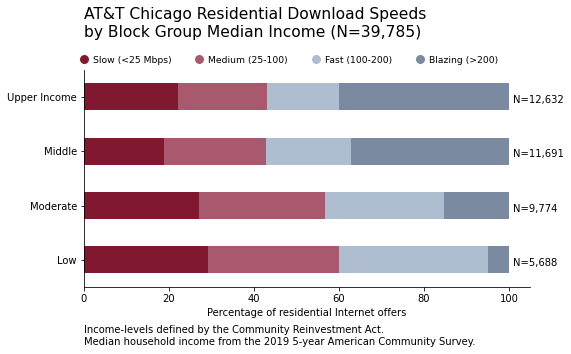

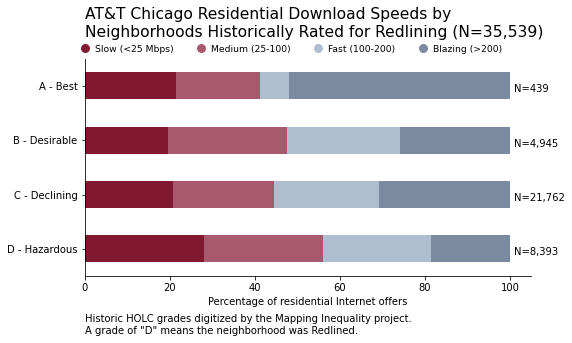

*******************************************************************************
cleveland


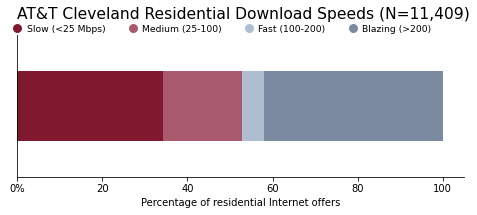

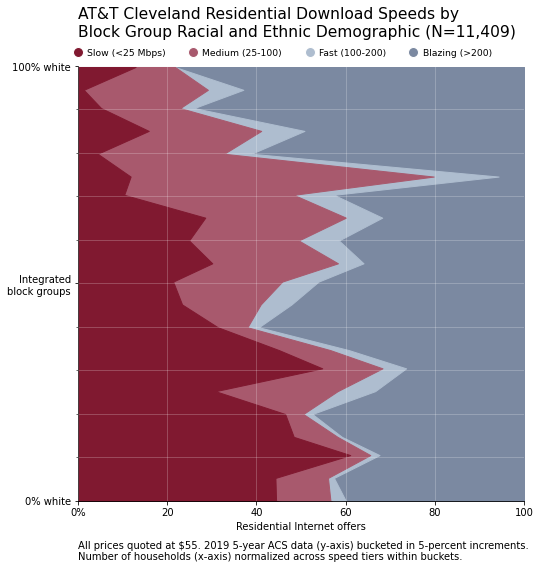

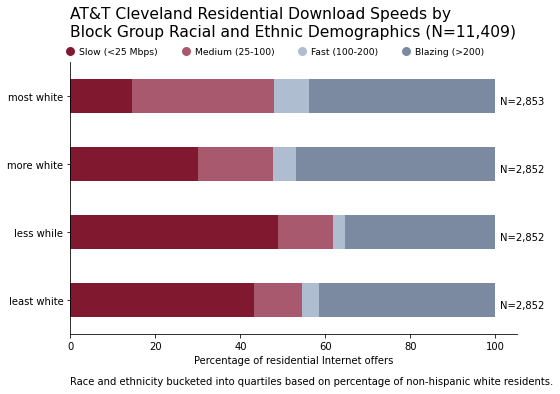

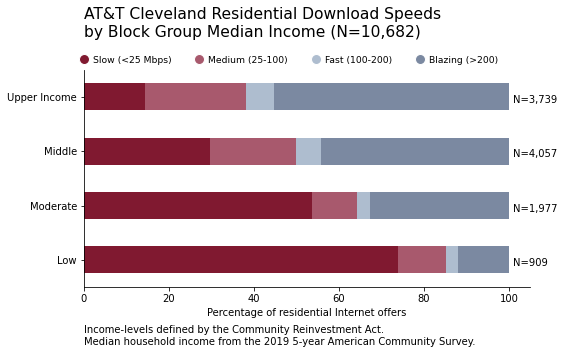

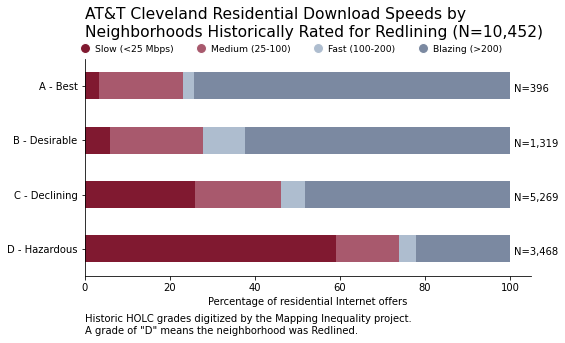

*******************************************************************************
detroit


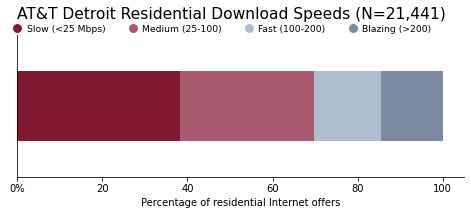

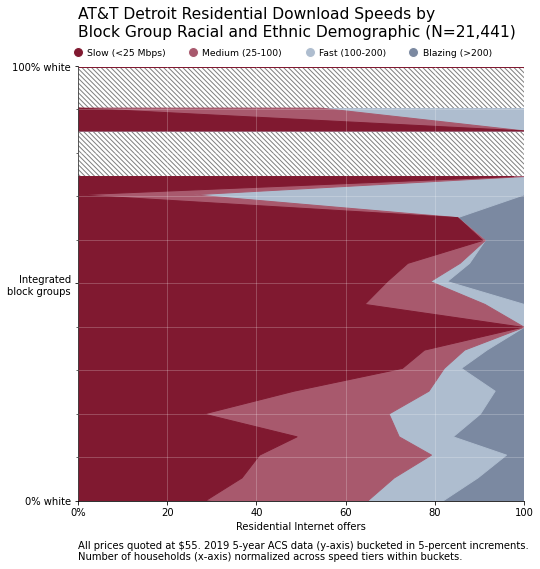

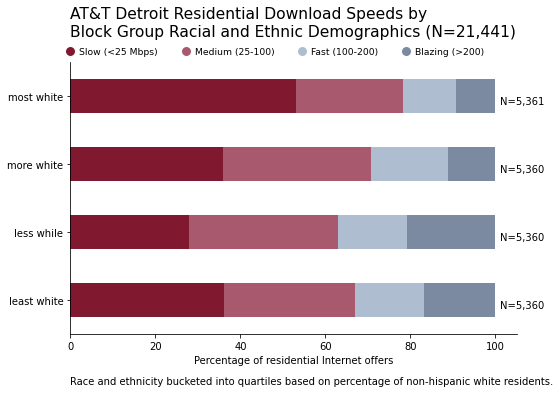

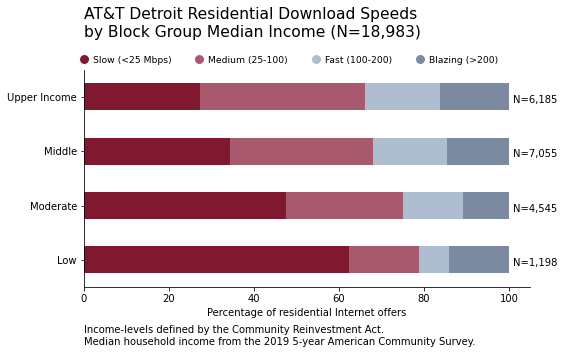

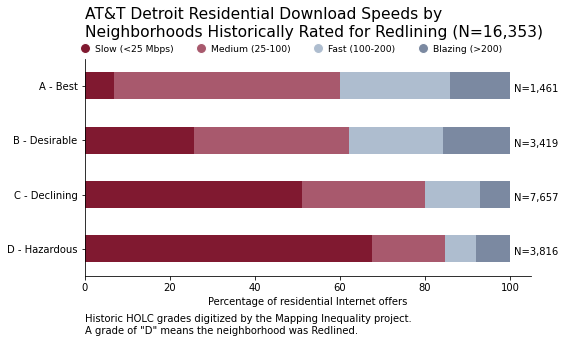

*******************************************************************************
houston


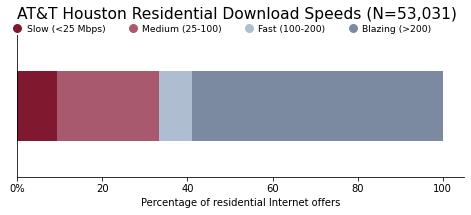

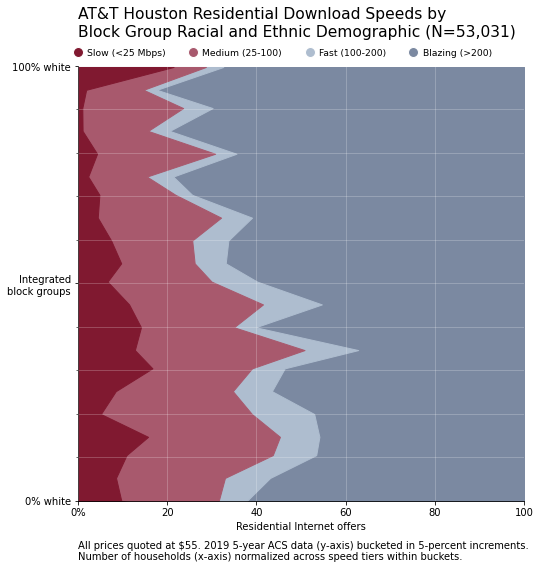

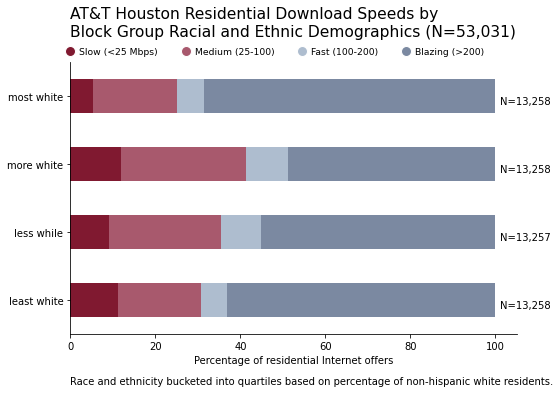

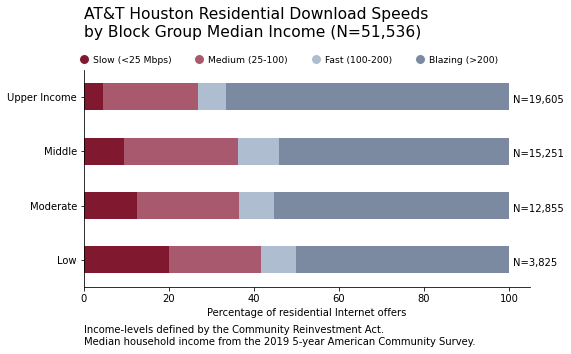

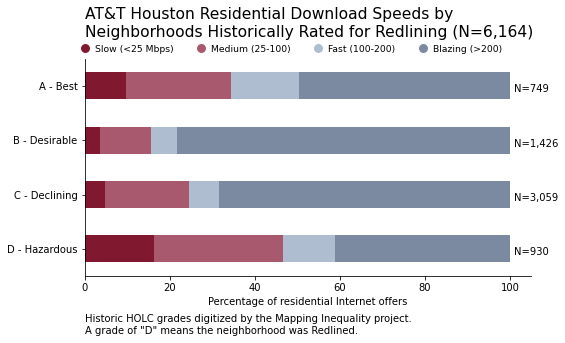

*******************************************************************************
huntsville


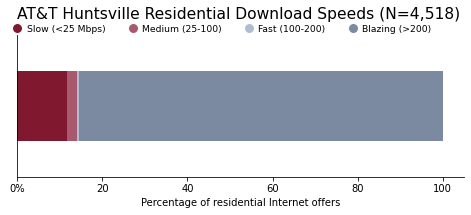

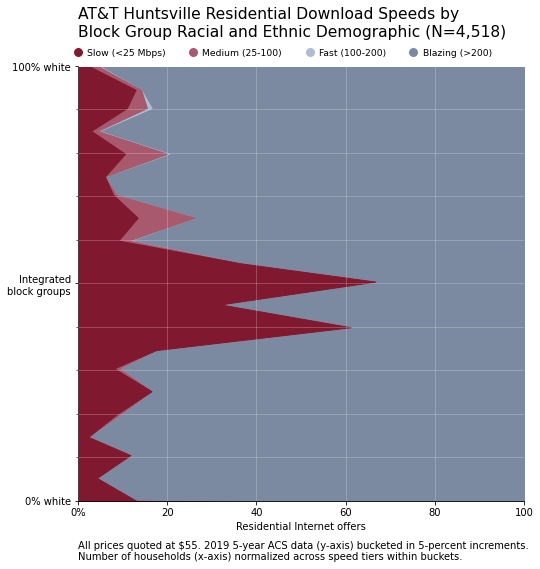

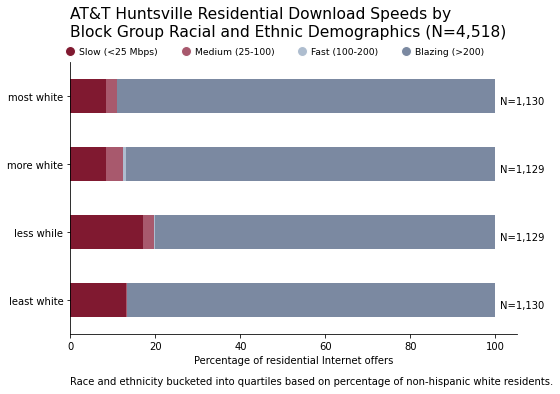

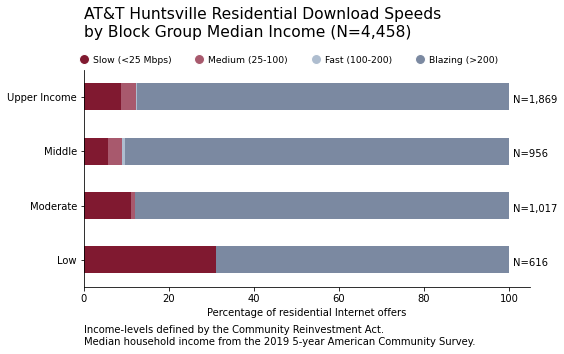

*******************************************************************************
indianapolis


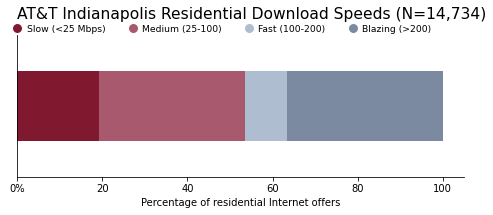

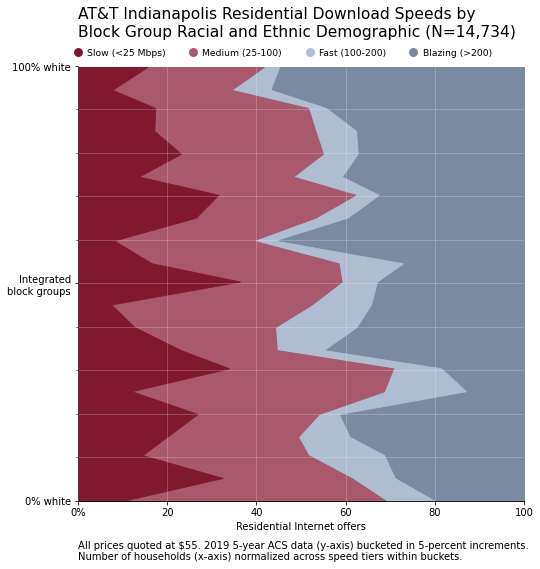

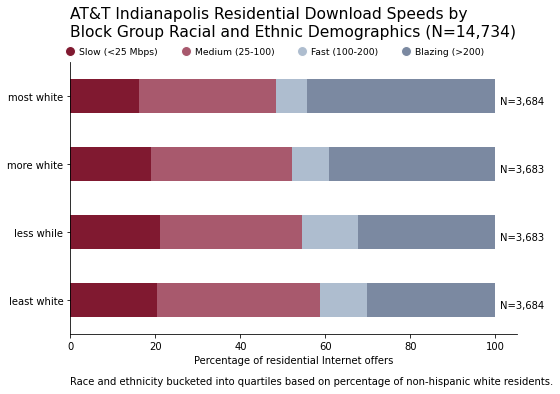

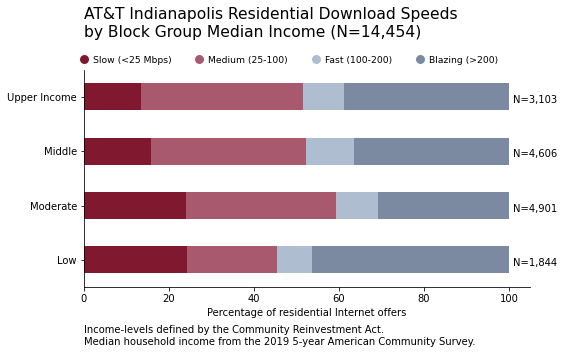

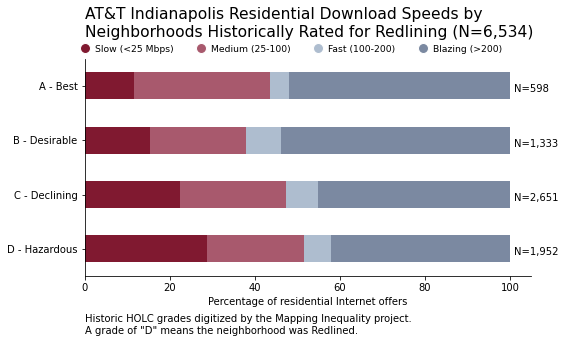

*******************************************************************************
jackson


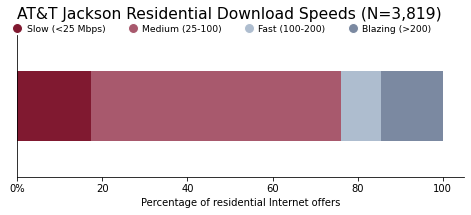

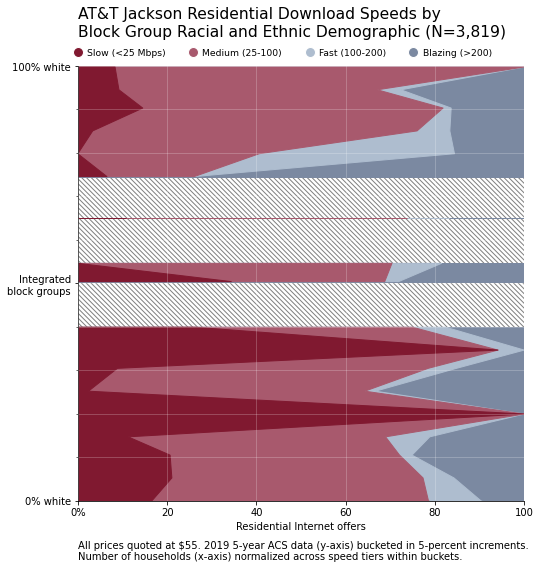

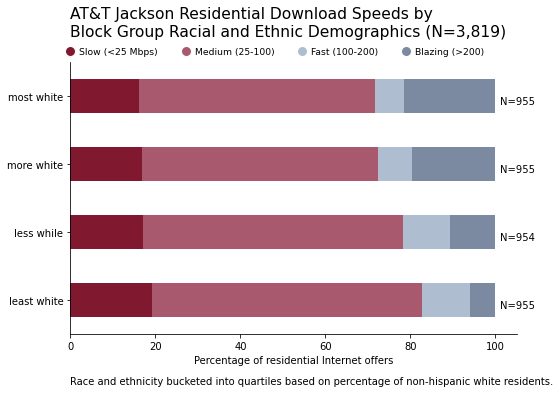

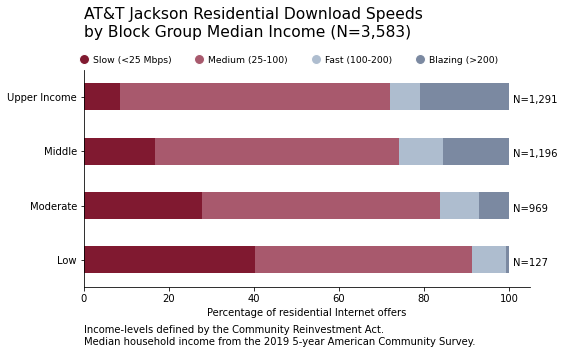

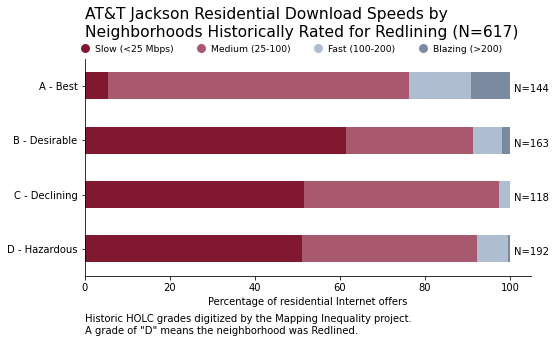

*******************************************************************************
jacksonville


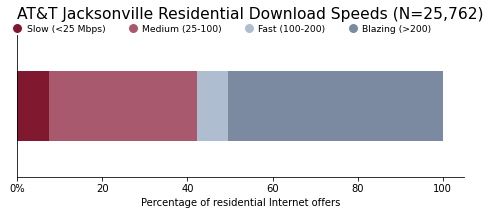

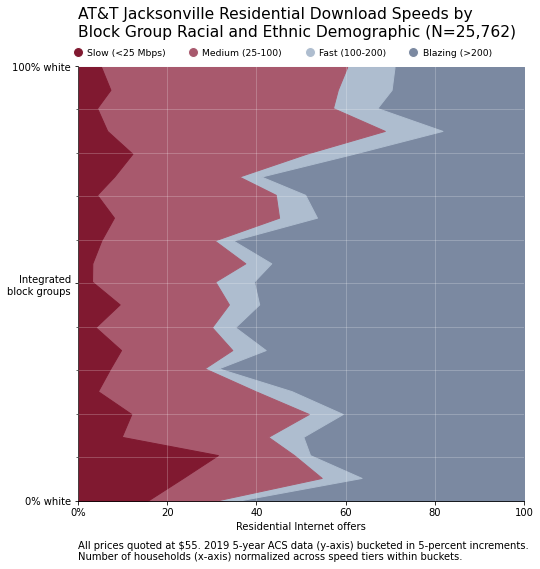

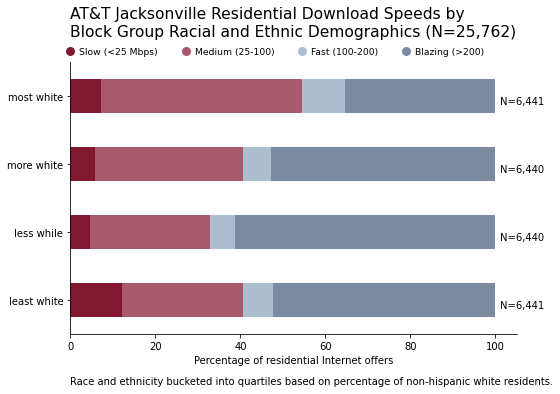

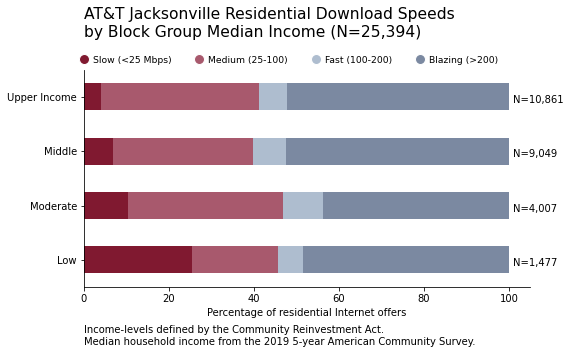

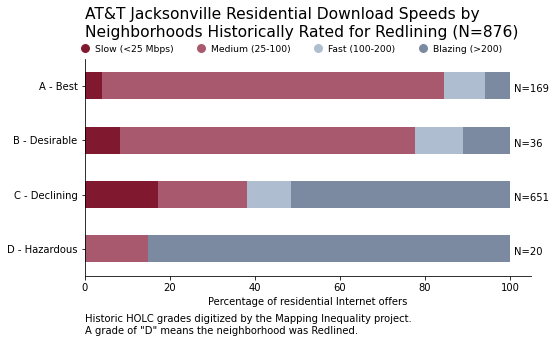

*******************************************************************************
kansas city


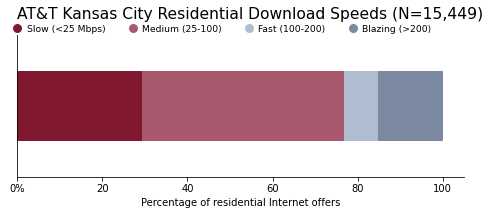

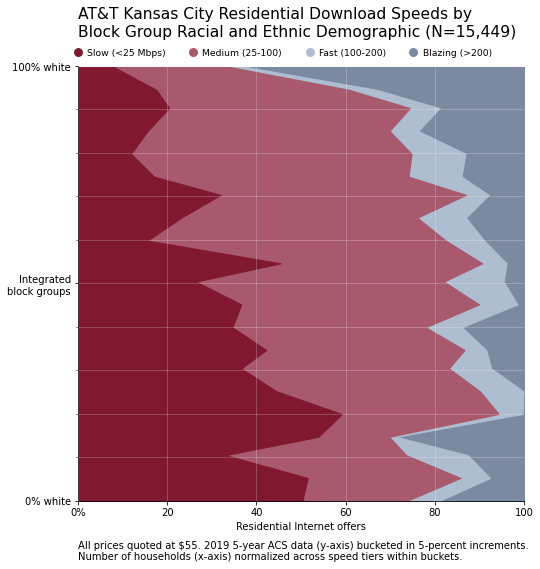

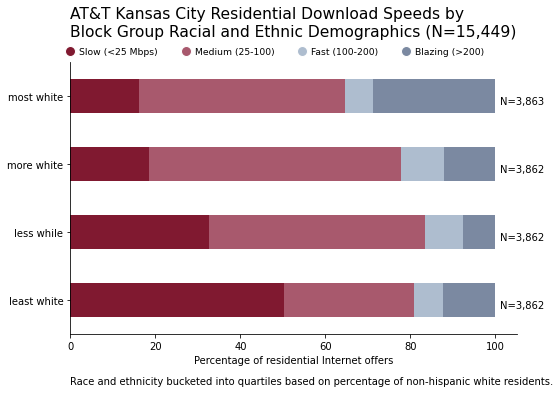

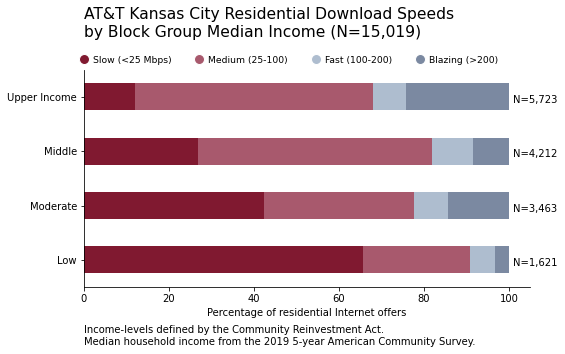

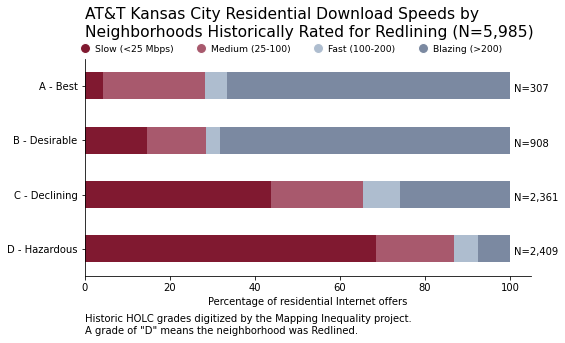

*******************************************************************************
little rock


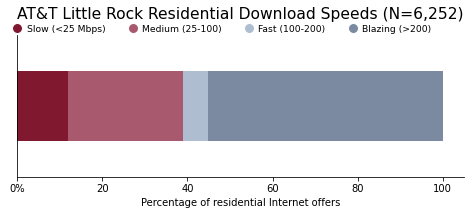

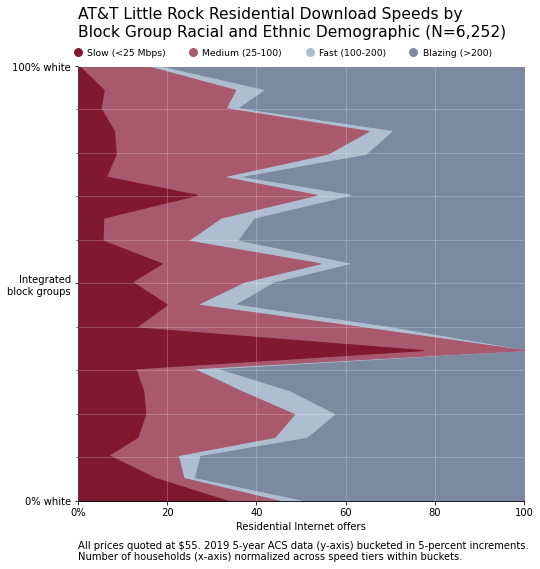

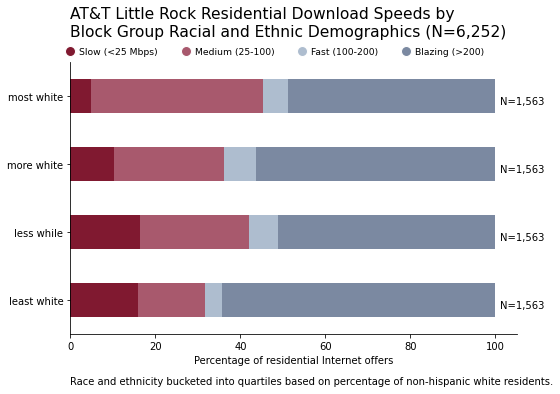

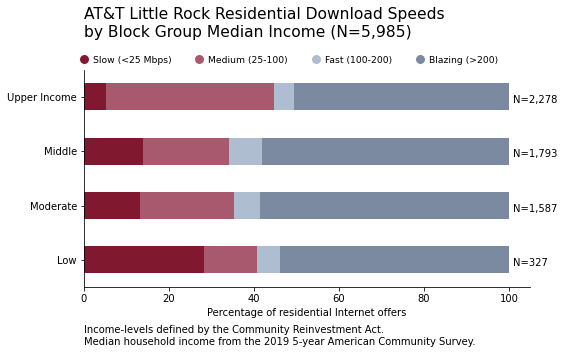

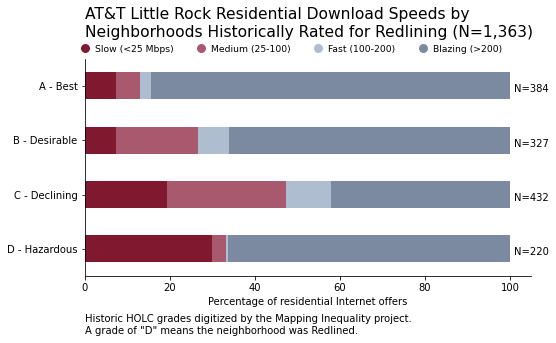

*******************************************************************************
los angeles


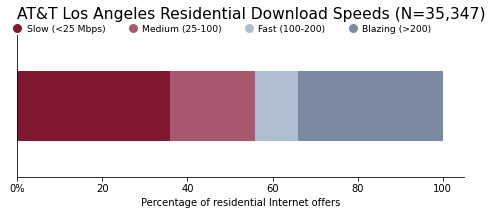

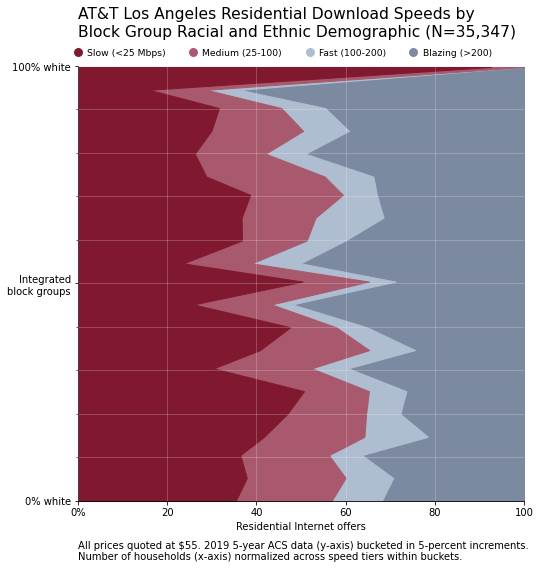

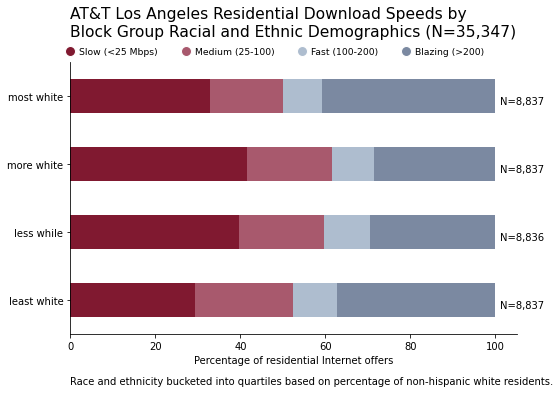

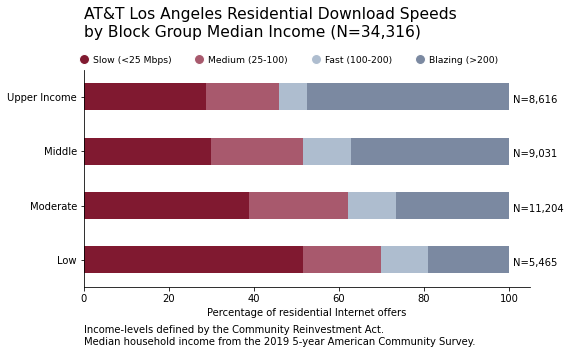

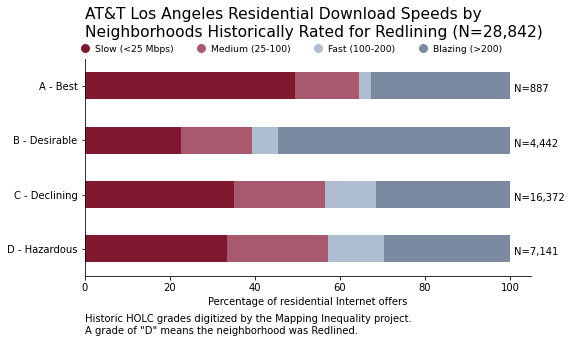

*******************************************************************************
louisville


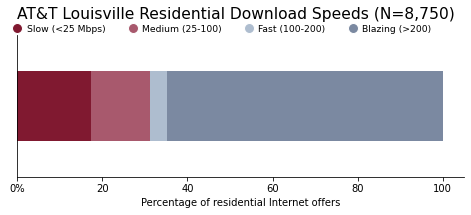

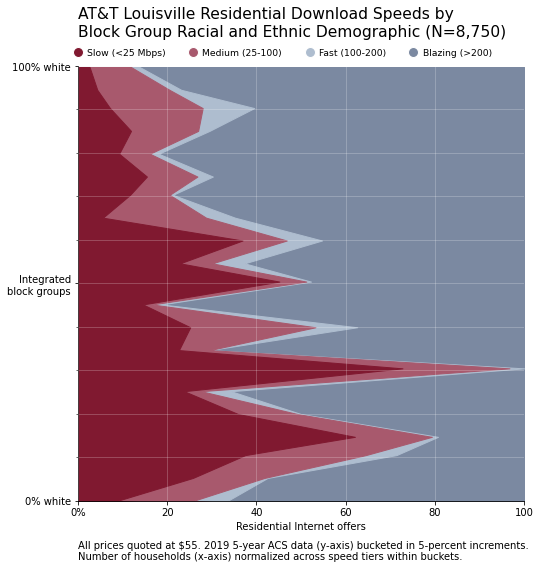

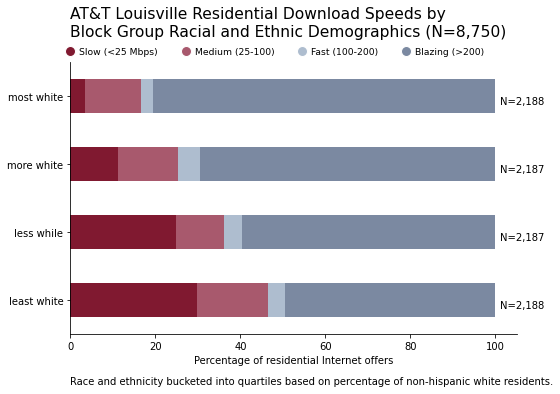

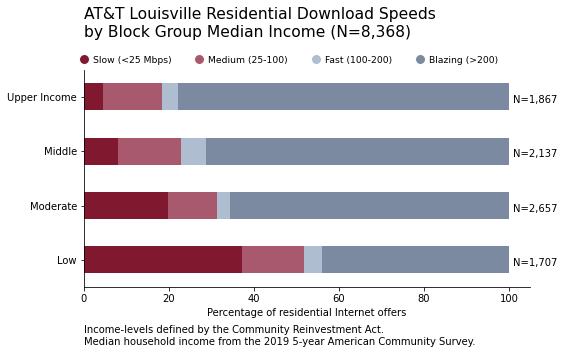

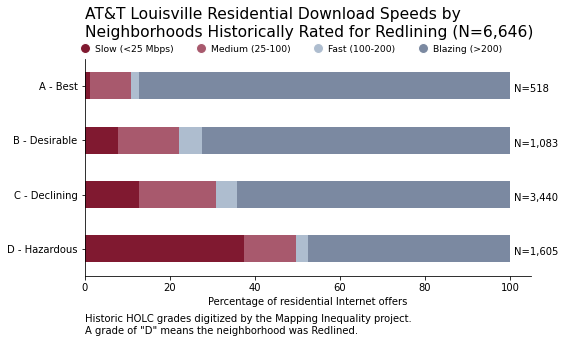

*******************************************************************************
memphis


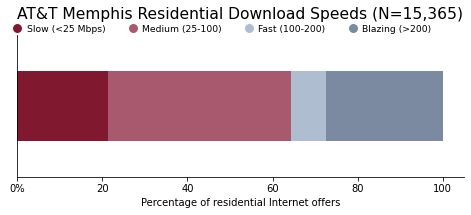

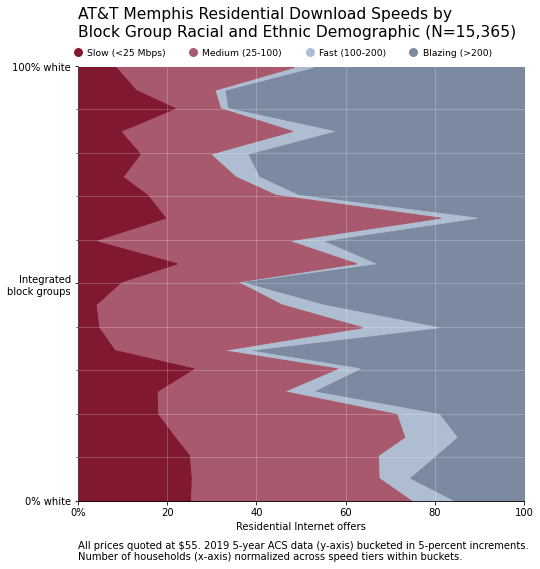

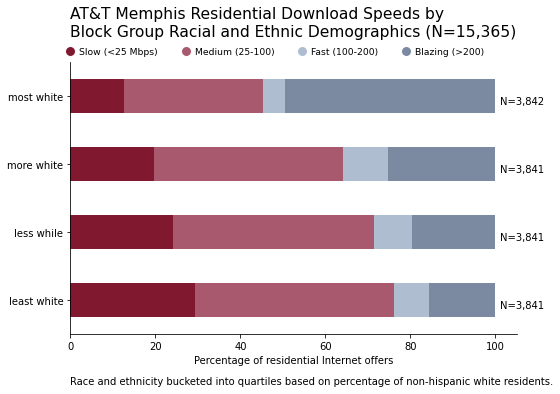

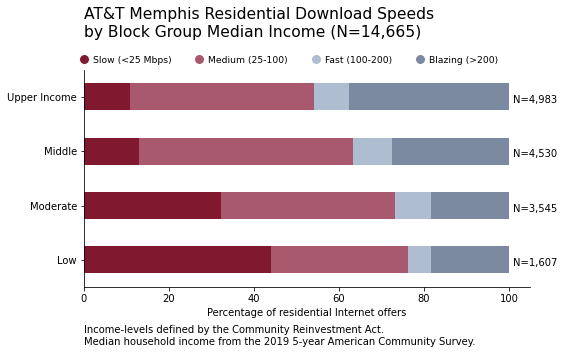

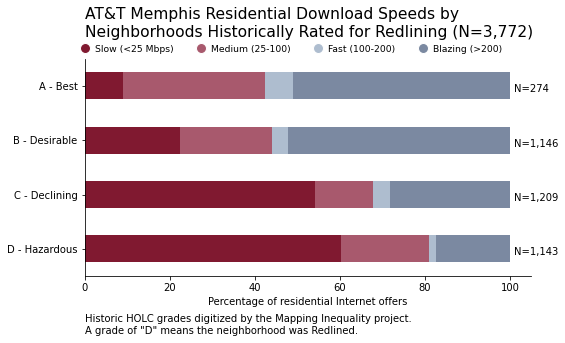

*******************************************************************************
milwaukee


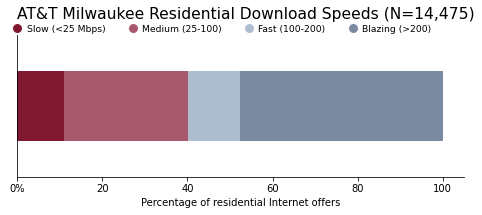

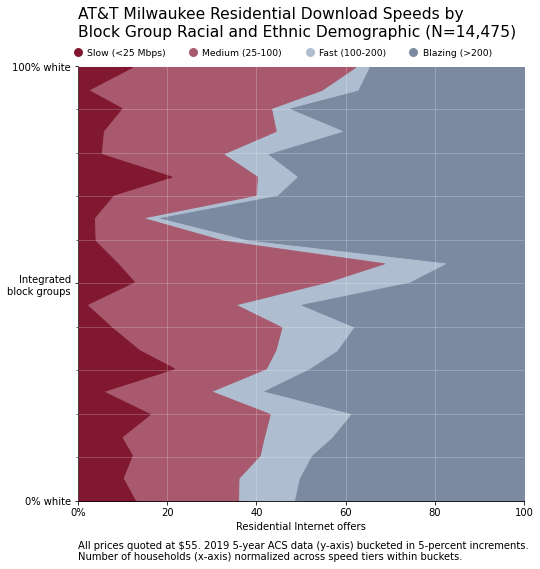

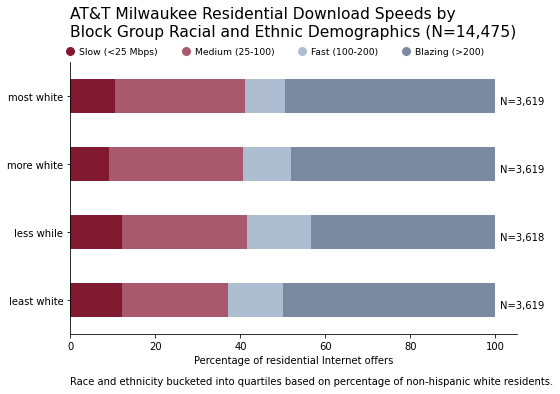

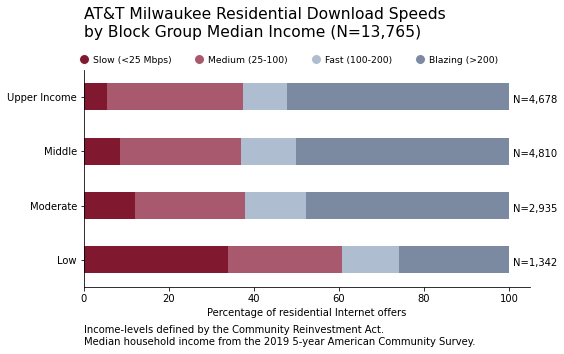

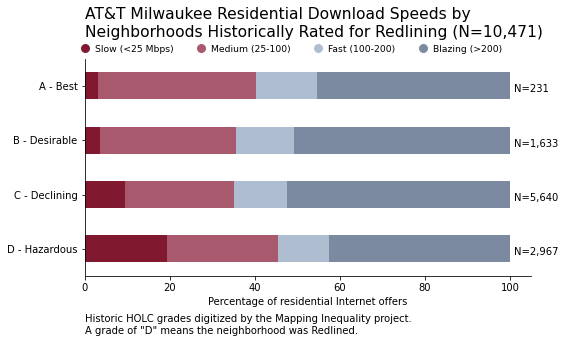

*******************************************************************************
new orleans


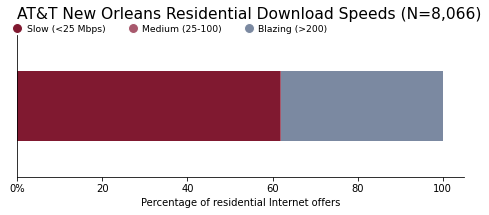

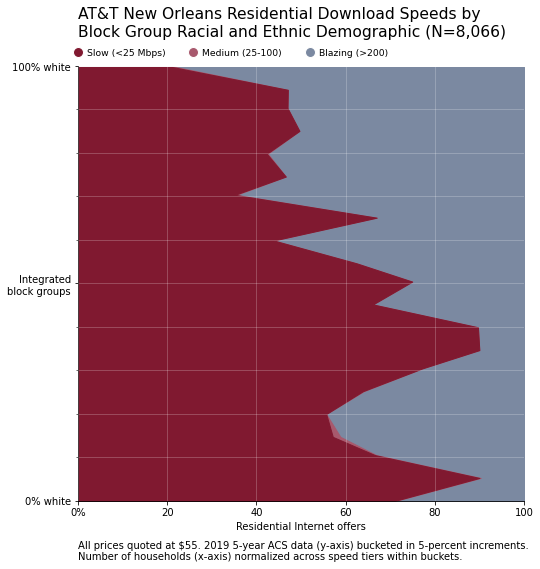

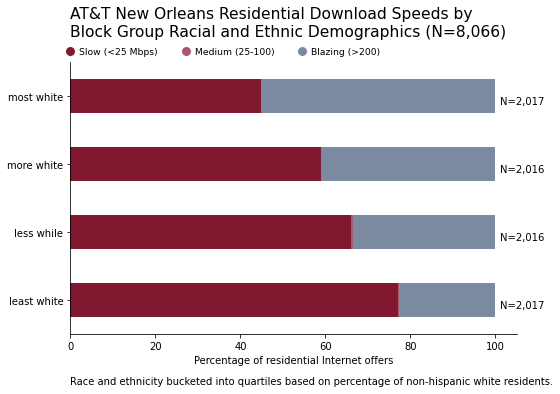

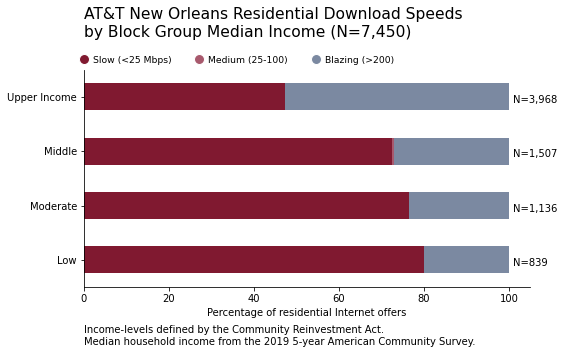

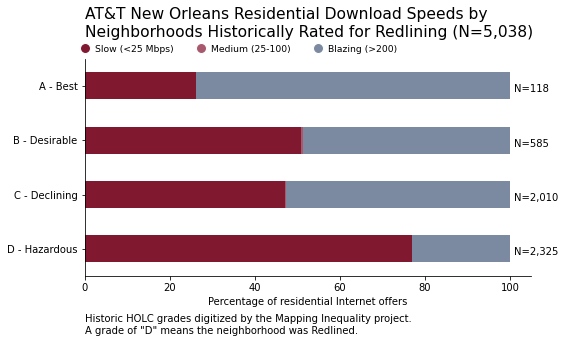

*******************************************************************************
oklahoma city


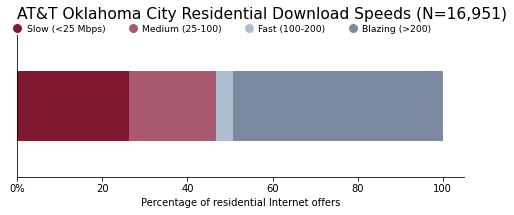

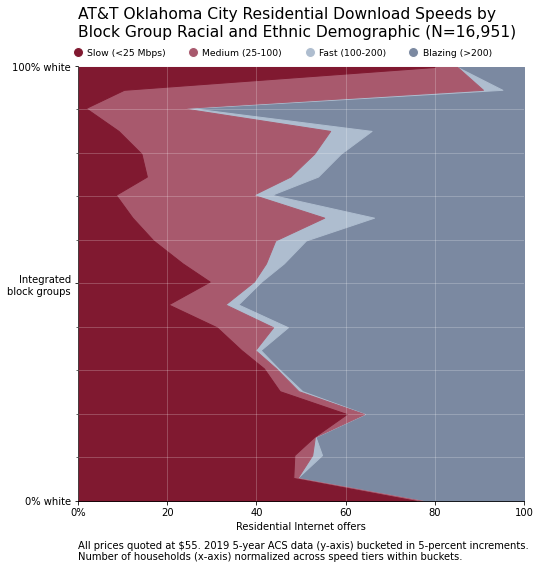

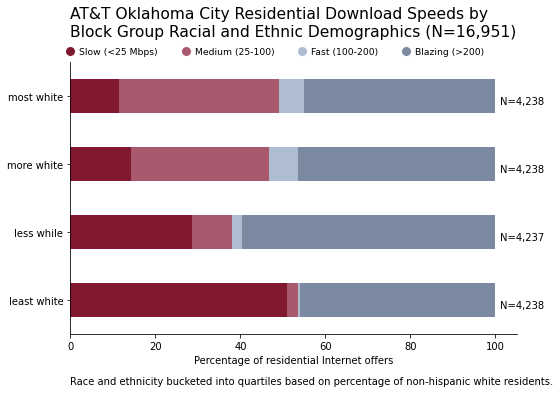

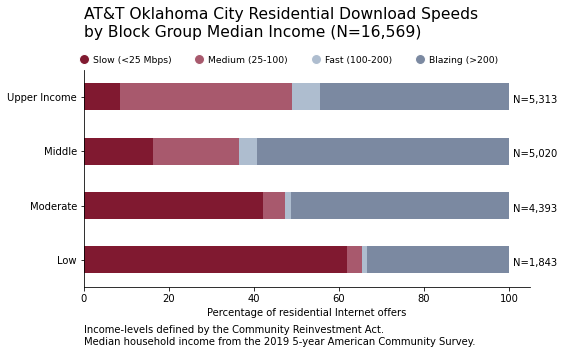

*******************************************************************************
wichita


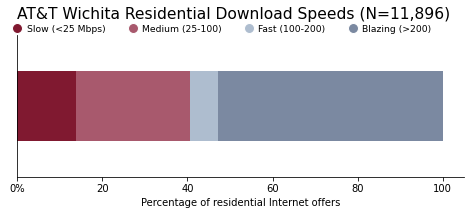

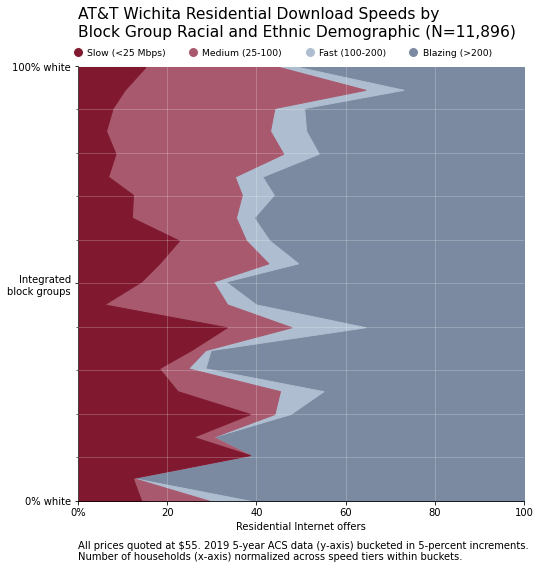

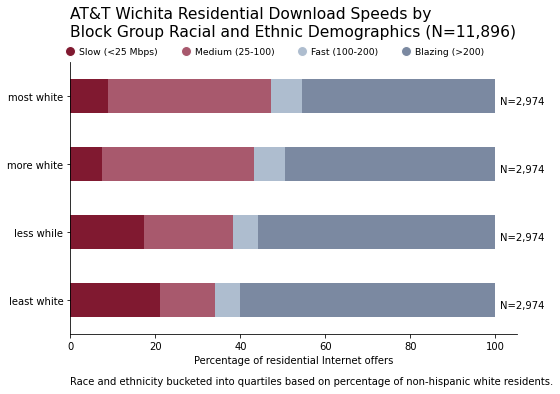

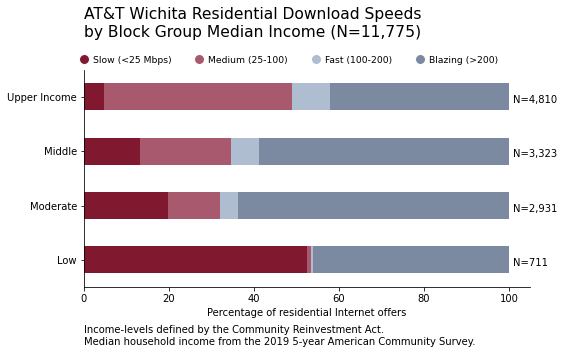

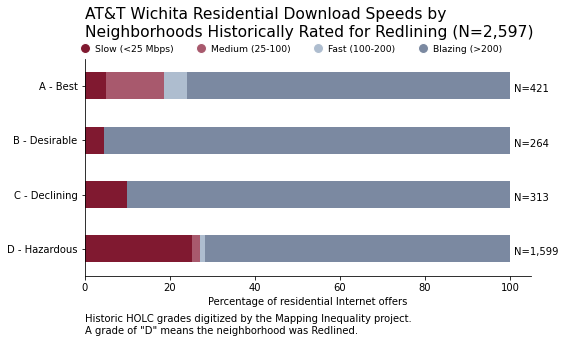

*******************************************************************************


In [18]:
for city, _df in att.groupby('major_city'):
    print(city)
    _df = bucket_and_bin(_df)
    speed_breakdown(_df, location=city.title())
    plot_race(_df, location=city.title())
    race(_df, location=city.title())
    income(_df, location=city.title())
    redlining(_df, location=city.title())
    fn_out = f'../data/intermediary/maps/att/{city}_offers.csv'
    if not os.path.exists(fn_out):
        os.makedirs(os.path.dirname(fn_out), exist_ok=True)
        _df.to_csv(fn_out, index=False)
    print("*" * 79)

## One city's graphs as an example

In [19]:
from pandas.api.types import CategoricalDtype
from config import income_labels

In [20]:
# outputs
fn_fig3a = '../data/output/figs/fig3_income.csv'
fn_fig3b = '../data/output/figs/fig3_race.csv'
fn_fig3c = '../data/output/figs/fig3_redline.csv'

In [21]:
df_city = bucket_and_bin(att[att.major_city == 'kansas city'])

In [22]:
df_city.loc[:, 'income_level'] = df_city['income_level'].astype(
     CategoricalDtype(income_labels, ordered=True)
).copy(deep=True)

to_plot = (df_city.groupby('income_level').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3a)

In [23]:
to_plot = (df_city.groupby('race_quantile').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3b)

In [24]:
to_plot = (df_city.groupby('redlining_grade').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3c)